Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Sprint 17 proyecto

1. Introducción
Objetivo del Proyecto: Pronosticar la tasa de cancelación de clientes de Interconnect utilizando datos sobre contratos, servicios y datos personales. El objetivo es identificar clientes con alta probabilidad de cancelación y ofrecerles promociones para retenerlos.
Justificación: Mejorar la retención de clientes mediante un sistema predictivo puede aumentar la satisfacción del cliente y los ingresos de la empresa.

3. Metodología
Enfoque y Técnicas:

Preparación de Datos: Limpieza de datos, manejo de valores faltantes, normalización.
se usarán los métodos info y describe de la librería pandas
Análisis Exploratorio: Estadísticas descriptivas, visualización de datos para entender las relaciones y patrones.

Comenzando por contract:

Vemos cómo hay columnas que se pueden cambiar a datetime (begindate y enddate) ademas esas 2 columnas se pueden operar para acer una tercer columna de duración total. (hay que tener cuidado con el "no" en enddate. Además podemos cambiar total charges a float y usar seaborn para plotear histogramas de los cargos mensuales y totales.

Siguiente vamos con personal:

Vemos como hay 3 columnas categoricas que podemos hace onehotencoding para gender partner y dependents. se pueden buscar correlaciones con seniorcitizens. si se llegara a juntar con el contract sería a través del customerId

Ahora con internet:

Vemos que todas las columnas necesitarían ser codificadas, parece que todas tienen solo 2 valores por lo que se puede hacer binario. vamos que no todos pueden tener internet así que hay que tomarlo en cuenta al juntar este df con otros. 

Por último es phone:

también se ve que no todos tienen teléfono. y una columna se puede codificar

Desarrollo de Características: Creación de variables adicionales basadas en los datos existentes.

Modelado Predictivo: Selección y entrenamiento de modelos de machine learning.

Herramientas:
Python, pandas, scikit-learn, matplotlib, seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [2]:
contract = pd.read_csv('final_provider/contract.csv')
personal = pd.read_csv('final_provider/personal.csv')
internet = pd.read_csv('final_provider/internet.csv')
phone = pd.read_csv('final_provider/phone.csv')

In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
contract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
710,1029-QFBEN,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Mailed check,19.55,19.55
6087,8319-QBEHW,2017-12-01,No,One year,Yes,Bank transfer (automatic),39.95,1023.75
3048,1728-BQDMA,2019-12-01,No,Month-to-month,No,Electronic check,44.45,82.7
4722,7581-EBBOU,2015-02-01,No,One year,Yes,Credit card (automatic),70.15,4224.7
3422,1837-YQUCE,2014-04-01,No,Two year,Yes,Bank transfer (automatic),58.35,4214.25
3686,5899-MQZZL,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Mailed check,75.00,999.45
4029,0019-GFNTW,2015-06-01,No,Two year,No,Bank transfer (automatic),45.05,2560.1
4196,6963-KQYQB,2014-04-01,No,Two year,No,Mailed check,24.05,1764.75
4423,5951-AOFIH,2017-05-01,No,Month-to-month,Yes,Credit card (automatic),66.40,2245.4
4007,1073-XXCZD,2015-07-01,No,Two year,No,Bank transfer (automatic),25.70,1443.65


In [5]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Podemos ver por el método info() que no hay valores nulos pero vemos en la columna enddate que tiene valores "No" por lo que hay que manejarlos con cuidado

In [6]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['Target'] = contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [7]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [8]:
contract['TotalCharges'].fillna(contract['MonthlyCharges'], inplace=True)

In [9]:
contract = pd.get_dummies(contract, columns=['Type', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

hacemos el encoding, veremos so con get_dummies funciona.

In [10]:
contract['ContractDuration'] = (contract['EndDate'] - contract['BeginDate']).dt.days

Nueva columna que podría ser útil

In [11]:
contract.sample(10)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Target,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContractDuration
1651,8580-AECUZ,2019-12-01,2020-01-01,79.10,79.10,1,False,False,True,False,True,False,31.0
4864,9475-NNDGC,2014-03-01,NaT,113.15,7953.25,0,True,False,True,False,False,False,NaN
2232,6479-SZPLM,2017-02-01,NaT,19.45,754.50,0,False,True,False,True,False,False,NaN
1467,8970-ANWXO,2018-03-01,NaT,73.75,1756.60,0,True,False,True,False,False,True,NaN
6740,7957-RYHQD,2016-09-01,2020-01-01,79.20,3233.85,1,False,False,True,True,False,False,1217.0
818,0115-TFERT,2018-02-01,2019-11-01,111.20,2317.10,1,False,False,True,False,True,False,638.0
4893,4432-ADRLB,2019-09-01,2019-11-01,44.65,74.90,1,False,False,False,False,False,True,61.0
1678,1060-ENTOF,2014-07-01,NaT,105.40,7035.60,0,True,False,True,True,False,False,NaN
4975,4822-LPTYJ,2014-02-01,NaT,103.75,7346.20,0,False,True,True,False,False,False,NaN
4243,9362-MWODR,2016-10-01,NaT,64.10,2460.35,0,False,False,True,True,False,False,NaN


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


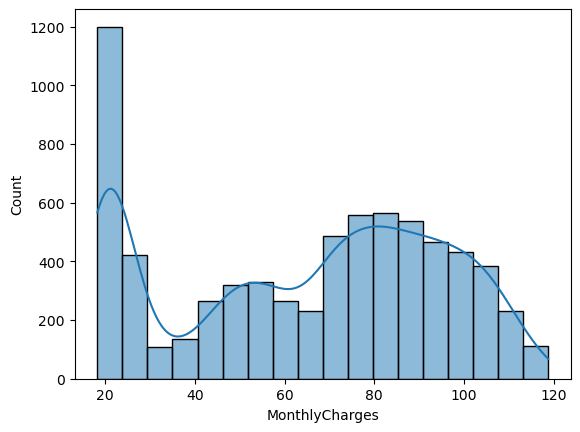

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


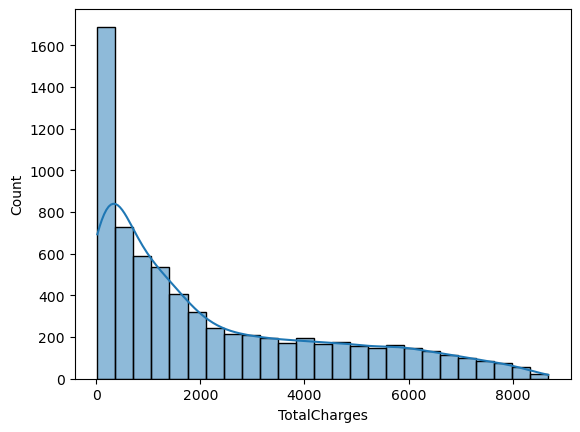

In [12]:
sns.histplot(contract['MonthlyCharges'], kde=True)
plt.show()

sns.histplot(contract['TotalCharges'], kde=True)
plt.show()

In [13]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Vemos que no hay datos nulos y los datos parecen ser todos del tipo correcto

In [14]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
1444,5514-YQENT,Male,0,No,Yes
3083,1599-EAHXY,Male,0,Yes,Yes
2938,5294-IMHHT,Male,0,Yes,No
6965,7789-CRUVC,Female,1,Yes,No
1046,0810-DHDBD,Female,0,No,No
1127,9330-DHBFL,Female,0,Yes,Yes
385,4895-TMWIR,Male,1,Yes,No
3134,7168-HDQHG,Female,0,Yes,Yes
1121,3696-XRIEN,Female,0,No,No
3634,3258-SYSWS,Male,1,No,No


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


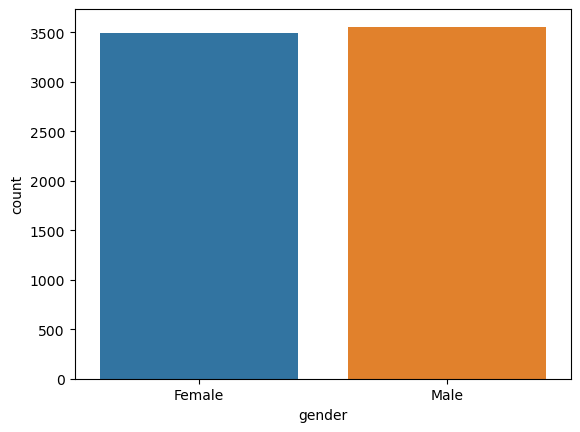

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


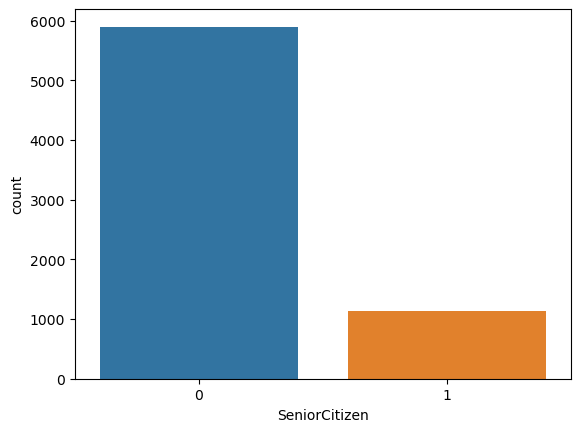

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


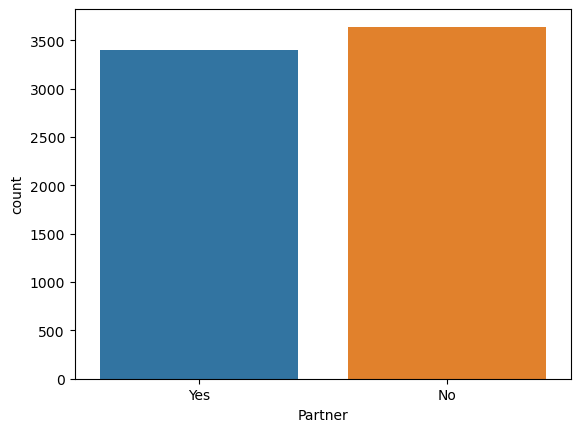

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


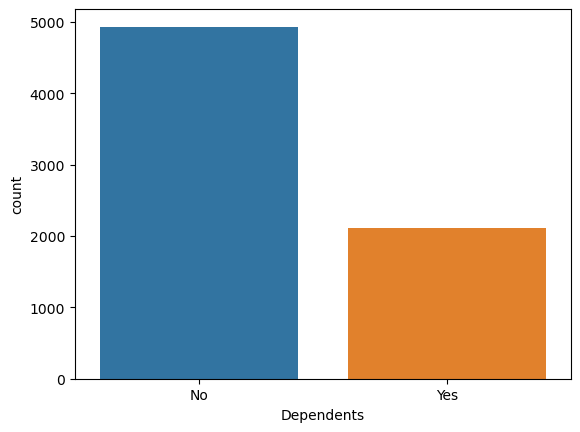

In [16]:
sns.countplot(data=personal, x='gender')
plt.show()

sns.countplot(data=personal, x='SeniorCitizen')
plt.show()

sns.countplot(data=personal, x='Partner')
plt.show()

sns.countplot(data=personal, x='Dependents')
plt.show()

In [17]:
personal['gender'] = personal['gender'].map({'Male': 1, 'Female': 0})
personal['Partner'] = personal['Partner'].map({'Yes': 1, 'No': 0})
personal['Dependents'] = personal['Dependents'].map({'Yes': 1, 'No': 0})

hacemos una codificación binaria porque vemos que los datos solo tienen 2 tipos.

In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [19]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [20]:
internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5431,6797-LNAQX,Fiber optic,No,Yes,No,No,Yes,Yes
3881,9795-VOWON,DSL,No,No,No,No,No,No
3723,5480-TBGPH,Fiber optic,No,Yes,Yes,No,Yes,Yes
4696,0440-MOGPM,DSL,No,Yes,Yes,No,Yes,Yes
4893,0328-GRPMV,Fiber optic,No,No,No,No,No,No
4906,3223-WZWJM,Fiber optic,No,No,No,No,No,Yes
858,4194-WHFCB,Fiber optic,No,Yes,No,Yes,No,Yes
4775,7153-CHRBV,DSL,Yes,No,Yes,Yes,No,No
5422,6257-DTAYD,Fiber optic,No,Yes,No,Yes,Yes,Yes
3127,0406-BPDVR,Fiber optic,No,Yes,No,No,Yes,Yes


No hay datos faltantes

In [21]:
internet = pd.get_dummies(internet, columns=['InternetService'], drop_first=False)
binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_columns:
    internet[col] = internet[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [22]:
internet.sample(10)

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber optic
4508,9761-XUJWD,0,1,0,1,0,1,True,False
4926,0754-UKWQP,0,0,1,0,1,1,False,True
691,9944-HKVVB,0,1,0,0,1,1,False,True
708,5170-PTRKA,1,0,0,1,0,0,True,False
1697,1784-EZDKJ,0,1,1,0,1,1,False,True
2385,0876-WDUUZ,0,0,0,1,0,1,False,True
923,6242-MBHPK,1,0,0,0,1,1,False,True
91,0486-HECZI,1,1,0,0,1,0,False,True
4579,9584-EXCDZ,0,0,0,0,0,0,False,True
3492,0667-NSRGI,0,0,1,1,0,1,True,False


hacemos la codificación onehotencoding para internetservice y el resto solamente codificación binaria

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Has realizado un buen esfuerzo al crear una matriz de correlación para visualizar las relaciones entre las diferentes variables de servicios. Sin embargo, hay un problema fundamental en tu enfoque que necesita ser abordado urgentemente:
Estás utilizando variables binarias (0 y 1) para calcular las correlaciones, lo cual no es apropiado para este tipo de análisis. Las variables categóricas codificadas como 0 y 1 no tienen un significado numérico real que permita calcular correlaciones de manera significativa. Esto puede llevar a interpretaciones erróneas de las relaciones entre las variables.</div>

In [23]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [24]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [25]:
phone.sample(10)

,customerID,MultipleLines
4369,3717-LNXKW,Yes
2311,0022-TCJCI,No
2951,1536-YHDOE,Yes
1657,5442-PPTJY,No
1266,2272-JKMSI,Yes
3858,2157-MXBJS,Yes
1769,8267-KFGYD,No
1392,7107-UBYKY,Yes
2967,2662-NNTDK,Yes
5849,8413-VONUO,No


In [26]:
phone['MultipleLines'] = phone['MultipleLines'].map({'Yes': 1, 'No': 0})

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


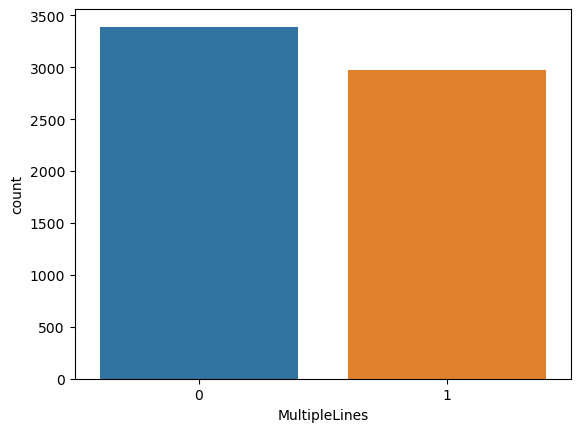

In [27]:
sns.countplot(data=phone, x='MultipleLines')
plt.show()

Vamos ahora a hacer un merge de los dfs

In [28]:
df = pd.merge(contract, personal, on='customerID', how='left')

In [29]:
df = pd.merge(df, internet, on='customerID', how='left')
df[binary_columns + ['InternetService_Fiber optic', 'InternetService_DSL']] = df[binary_columns + ['InternetService_Fiber optic', 'InternetService_DSL']].fillna(0)

In [30]:
df.sample(10)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Target,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),...,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber optic
1788,7416-CKTEP,2015-05-01,NaT,19.60,1134.25,0,False,True,True,False,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6428,2079-FBMZK,2019-05-01,2019-11-01,69.25,418.40,1,False,False,True,False,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
3942,6959-UWKHF,2019-12-01,2020-01-01,42.90,42.90,1,False,False,True,False,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
5939,4712-AUQZO,2018-08-01,NaT,33.60,550.35,0,False,False,False,False,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,True,False
2771,6366-XIVKZ,2019-01-01,NaT,63.15,816.80,0,False,False,True,False,...,1,1,1.0,0.0,1.0,0.0,0.0,1.0,True,False
5820,1752-OZXFY,2015-02-01,NaT,59.80,3561.15,0,True,False,True,False,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,True,False
5028,0254-FNMCI,2014-02-01,NaT,109.90,7624.20,0,False,True,True,False,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,False,True
5109,7113-HIPFI,2014-08-01,NaT,65.85,4097.05,0,False,True,False,False,...,1,1,1.0,1.0,1.0,1.0,0.0,0.0,True,False
5345,9526-JAWYF,2017-11-01,2020-01-01,89.80,2335.30,1,False,False,False,False,...,0,0,0.0,1.0,1.0,0.0,1.0,0.0,False,True
1824,0794-YVSGE,2014-02-01,NaT,20.30,1401.15,0,False,True,False,False,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [31]:
df = pd.merge(df, phone, on='customerID', how='left')
df['MultipleLines'].fillna(0, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   EndDate                                1869 non-null   datetime64[ns]
 3   MonthlyCharges                         7043 non-null   float64       
 4   TotalCharges                           7043 non-null   float64       
 5   Target                                 7043 non-null   int64         
 6   Type_One year                          7043 non-null   bool          
 7   Type_Two year                          7043 non-null   bool          
 8   PaperlessBilling_Yes                   7043 non-null   bool          
 9   PaymentMethod_Credit card (automatic)  7043 non-null   bool    

In [33]:
df.sample(10)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Target,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),...,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber optic,MultipleLines
2845,9093-FPDLG,2019-03-01,NaT,94.20,999.90,0,False,False,True,False,...,0,0.0,1.0,1.0,1.0,0.0,1.0,False,True,0.0
3416,0603-OLQDC,2019-02-01,NaT,69.85,837.50,0,False,False,True,False,...,1,1.0,0.0,0.0,0.0,1.0,1.0,True,False,0.0
7030,0871-OPBXW,2019-12-01,NaT,20.05,39.25,0,False,False,True,False,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6942,3454-JFUBC,2014-06-01,NaT,20.00,1396.00,0,False,True,True,True,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3784,4958-XCBDQ,2016-11-01,2019-10-01,101.40,3496.30,1,False,False,True,False,...,0,0.0,0.0,1.0,0.0,1.0,1.0,False,True,1.0
5040,9909-IDLEK,2018-06-01,NaT,96.80,1826.70,0,False,False,False,False,...,1,0.0,1.0,0.0,1.0,1.0,0.0,False,True,1.0
1522,5766-XQXMQ,2017-06-01,2019-11-01,68.85,1970.50,1,False,False,True,False,...,0,1.0,1.0,1.0,0.0,0.0,1.0,True,False,0.0
1483,0743-HNPFG,2015-11-01,NaT,69.75,3562.50,0,True,False,True,True,...,1,1.0,1.0,0.0,1.0,0.0,1.0,True,False,0.0
1433,6439-LAJXL,2019-05-01,NaT,68.95,593.85,0,False,False,True,False,...,0,1.0,1.0,0.0,1.0,1.0,0.0,True,False,0.0
2399,7176-WIONM,2019-02-01,NaT,49.85,617.15,0,False,False,True,False,...,0,0.0,0.0,1.0,0.0,1.0,1.0,True,False,0.0


In [34]:
df['target'] = df['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

In [35]:
X = df.drop(columns=['customerID', 'BeginDate', 'EndDate', 'Target', 'ContractDuration'])
y = df['Target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# RandomForest

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300)


In [39]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.sample(10)

,feature,importance
9,SeniorCitizen,0.018851
2,Type_One year,0.052860
0,MonthlyCharges,0.152107
5,PaymentMethod_Credit card (automatic),0.009898
8,gender,0.015412
6,PaymentMethod_Electronic check,0.072736
7,PaymentMethod_Mailed check,0.008561
1,TotalCharges,0.242167
17,StreamingMovies,0.014586
20,MultipleLines,0.014360


In [40]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [41]:
model = RandomForestClassifier(class_weight='balanced')

In [42]:
scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"Promedio de AUC-ROC en la validación cruzada: {scores.mean()}")

Promedio de AUC-ROC en la validación cruzada: 0.92203579766514


In [43]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC-ROC: {auc_roc}")
print(f"Exactitud: {accuracy}")

AUC-ROC: 0.8444155544739607
Exactitud: 0.8026969481902059


# DecisionTree

In [44]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [45]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10)


In [46]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.sample(10)

,feature,importance
0,MonthlyCharges,0.096628
10,Partner,0.017438
8,gender,0.010648
11,Dependents,0.016838
16,StreamingTV,0.012181
20,MultipleLines,0.025978
9,SeniorCitizen,0.008720
5,PaymentMethod_Credit card (automatic),0.006644
7,PaymentMethod_Mailed check,0.006999
2,Type_One year,0.041330


In [47]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [48]:
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"Promedio de AUC-ROC en la validación cruzada: {cv_scores.mean()}")

Promedio de AUC-ROC en la validación cruzada: 0.8788542669394005


In [49]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC-ROC: {auc_roc}")
print(f"Exactitud: {accuracy}")

AUC-ROC: 0.8060442656966469
Exactitud: 0.7849538679914834


# Logistic regression

In [50]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [51]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None wil

In [52]:
coefficients = best_model.coef_[0]
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='coefficient', ascending=False)
feature_importance_df.sample(10)

,feature,coefficient
18,InternetService_DSL,1.321910
3,Type_Two year,-1.609975
10,Partner,-0.084702
8,gender,-0.026307
12,OnlineSecurity,-0.355462
21,target,0.000000
5,PaymentMethod_Credit card (automatic),-0.133558
14,DeviceProtection,0.034647
6,PaymentMethod_Electronic check,0.342839
1,TotalCharges,-0.000303


In [53]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [54]:
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"Promedio de AUC-ROC en la validación cruzada: {cv_scores.mean()}")

Promedio de AUC-ROC en la validación cruzada: 0.8742413656729932


In [55]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC-ROC: {auc_roc}")
print(f"Exactitud: {accuracy}")

AUC-ROC: 0.8403617081230628
Exactitud: 0.8062455642299503


# Catboost

In [56]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

In [57]:
model = CatBoostClassifier(verbose=0, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [58]:
feature_importance = best_model.get_feature_importance()
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.sample(10)

,feature,importance
14,DeviceProtection,0.358224
3,Type_Two year,21.470240
11,Dependents,1.328355
10,Partner,0.304550
8,gender,0.510003
6,PaymentMethod_Electronic check,2.951677
13,OnlineBackup,0.606983
21,target,0.000000
0,MonthlyCharges,10.475686
7,PaymentMethod_Mailed check,0.687370


In [59]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"Promedio de AUC-ROC en la validación cruzada: {cv_scores.mean()}")

Promedio de AUC-ROC en la validación cruzada: 0.9306090455354118


In [61]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC-ROC: {auc_roc}")
print(f"Exactitud: {accuracy}")

AUC-ROC: 0.8454619975920281
Exactitud: 0.8062455642299503


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
- La optimización de hiperparámetros es una omisión significativa en este proyecto. Es crucial implementar técnicas como GridSearchCV o RandomizedSearchCV para cada modelo. Esto no solo mejorará el rendimiento, sino que también asegurará que estamos comparando las versiones optimizadas de cada algoritmo.

Falta un análisis de la importancia de las características. Este es un paso esencial para:

Entender qué variables son más predictivas para la cancelación de clientes.
Potencialmente simplificar el modelo eliminando características menos importantes.
Proporcionar insights accionables a la empresa sobre los factores que más influyen en la cancelación.
Considere usar feature_importances_ para modelos basados en árboles o coeficientes para regresión logística.


No se aborda el posible desbalance en la variable objetivo. En problemas de predicción de cancelación, es común que la clase de "clientes que cancelan" sea minoritaria. Si existe este desbalance, es crucial aplicar técnicas como:

SMOTE (Synthetic Minority Over-sampling Technique) para sobremuestrear la clase minoritaria.
Ajuste de pesos de clase en los algoritmos que lo permitan.
Técnicas de submuestreo para la clase mayoritaria.


La validación del modelo se limita a una simple división train-test. Esto puede llevar a una estimación poco robusta del rendimiento del modelo. Es necesario implementar:

Validación cruzada k-fold para una evaluación más confiable.
Posiblemente, validación cruzada estratificada para mantener la proporción de clases en cada fold.


No se incluye una discusión sobre las implicaciones éticas de predecir la cancelación de clientes. Esto es un aspecto importante en proyectos de este tipo. Considere abordar:

</div>

Ahora, el analisis para la predicción de qué clientes es más probable que dejen la empresa puede implicar un trato favorito a ciertos clientes, lo que podría dañar la relación con los clientes. Si un grupo demográfico cancela su plan por cierto factor externo también se podría discriminar a ese grupo. se necesita el consentimiento de los clientes para manejar sus datos y mucha responsabilidad y transparencia, pues de no ser así la reputación de la empresa también podría ser afectada.